In [1]:
import numpy as np
import cv2
import csv
import caffe
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
"""SlotId	X	Y	W	H
613	2088	1570	380	373
614	1204	1560	380	380
"""

In [15]:
# key: SlotId
# value: [X, Y, W, H]
bbox_set = {613:[2088, 1570, 380, 373],
        614:[1204, 1560, 380, 380]}

In [2]:
bbox_set2={}

In [3]:
# construct "bbox_set2" dict
with open('/data/code4/deep-parking/dataset/camera8.csv') as csvfile:
    reader = csv.reader(csvfile)
    #for line in reader:
    for idx, line in enumerate(reader):
        if idx==0:
            continue
        #print(line)
        # add into bbox_set
        bbox_set2[int(line[0])]= [int(line[1]), int(line[2]), int(line[3]), int(line[4])]

In [12]:
bbox_set2.keys

<function dict.keys>

In [5]:
bbox_set2[613] # x_pos, y_pos, width, height

[2088, 1570, 380, 373]

In [4]:
#SlotId = 613

In [5]:
#bbox[SlotId]

[2088, 1570, 380, 373]

In [ ]:
# original image resolution : 2592 x 1944
# given image resolution: 1000x750
# width_ratio = 1000/2592 = 3.385802
# height_ratio = 750/1944 = 0.385802

In [6]:
ratio = 1000/2592
print(ratio)

0.38580246913580246


In [7]:
# read image using opencv2 and display it using plt (matplotlib)
img = cv2.imread("/data/code4/deep-parking/dataset/FULL_IMAGE_1000x750/OVERCAST/2015-11-20/camera8/2015-11-20_1041.jpg")

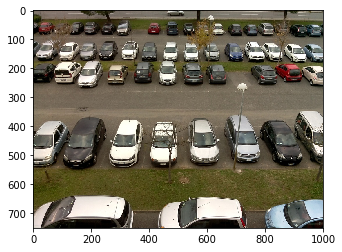

In [8]:
img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)

In [9]:
import caffe

In [ ]:
# pass patch to CNN network
# 54 patches in camera 8

In [13]:
patches = {}

In [14]:
font = cv2.FONT_HERSHEY_COMPLEX

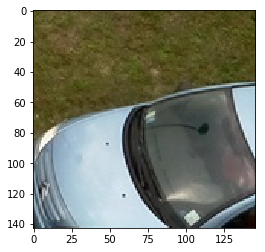

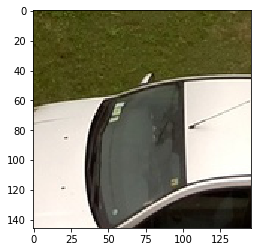

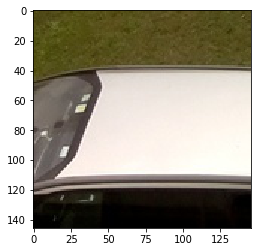

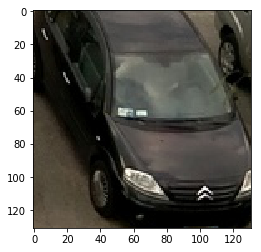

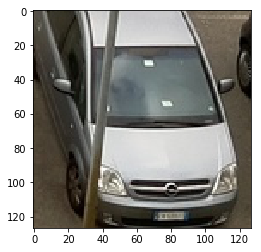

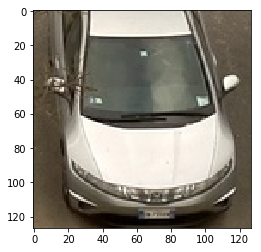

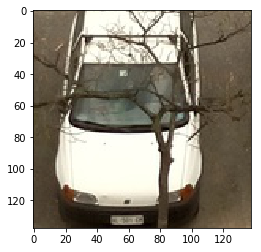

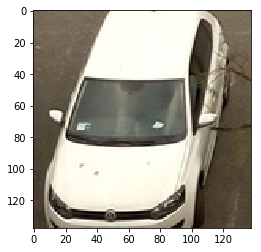

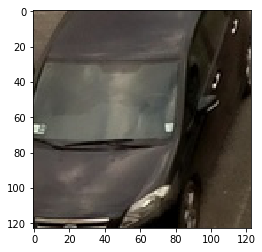

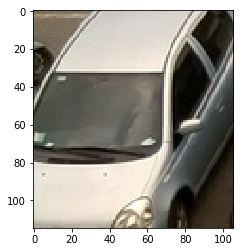

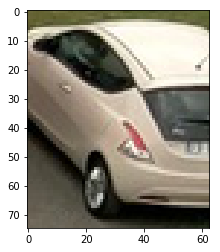

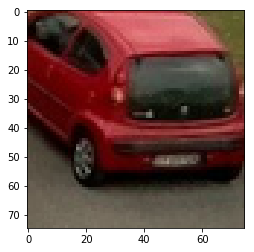

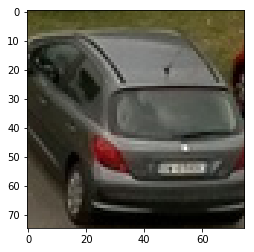

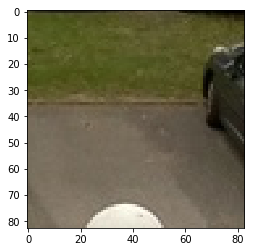

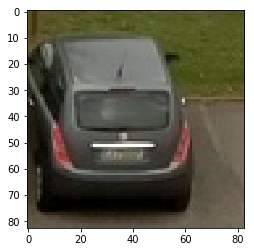

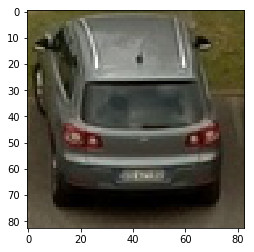

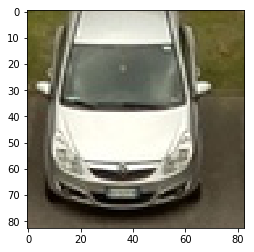

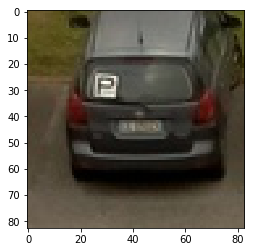

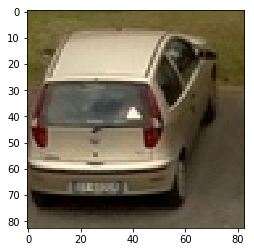

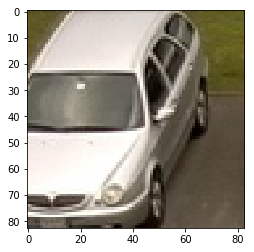

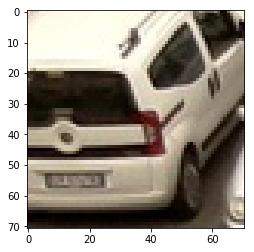

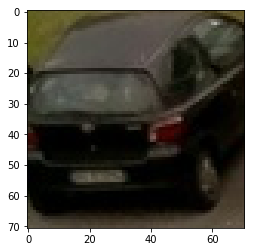

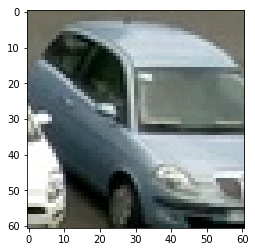

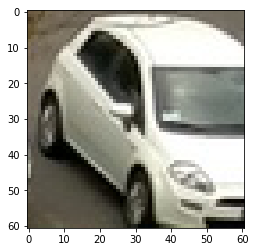

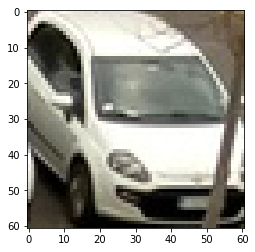

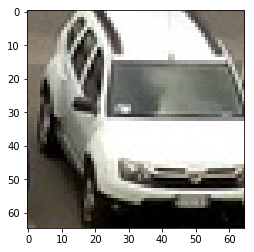

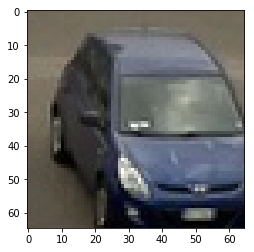

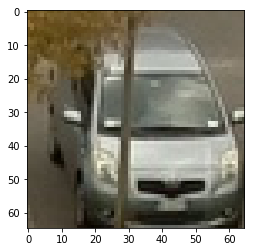

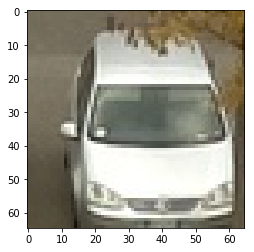

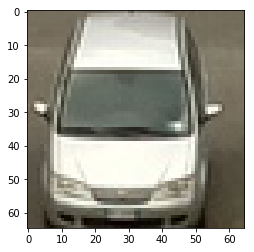

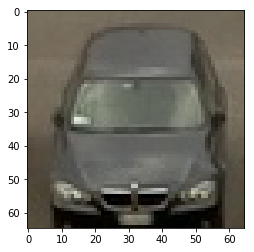

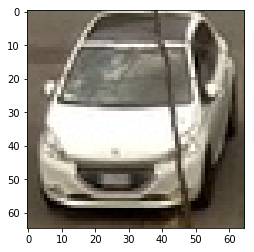

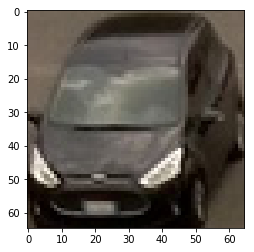

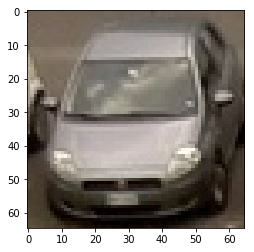

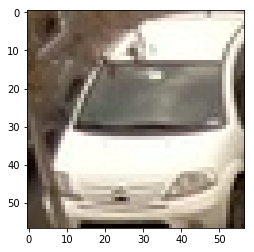

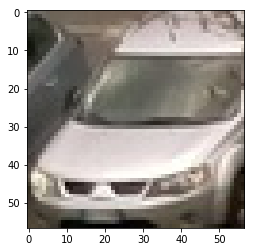

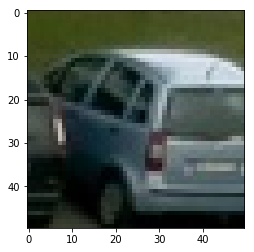

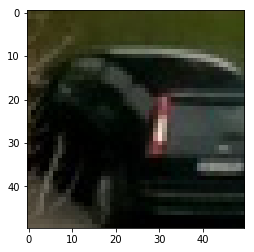

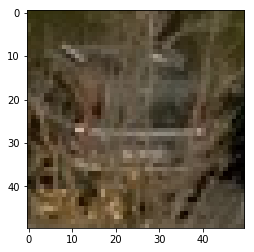

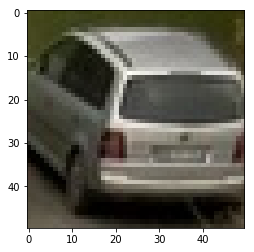

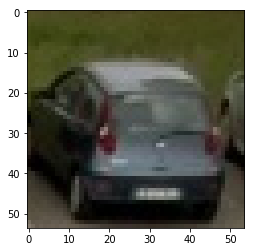

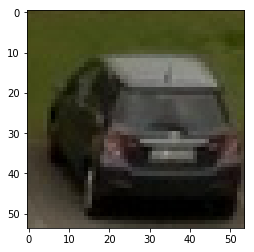

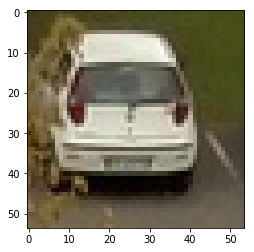

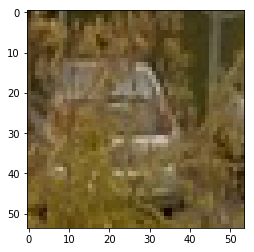

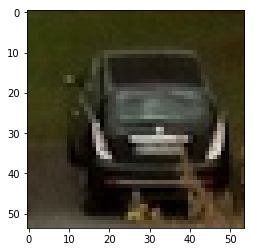

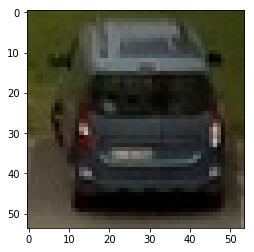

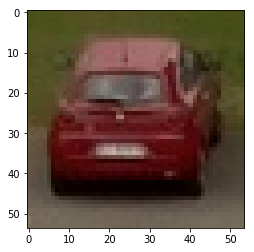

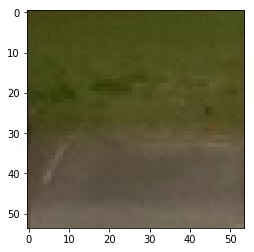

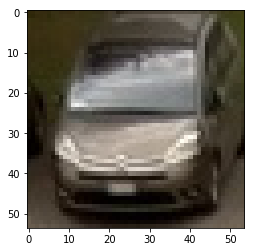

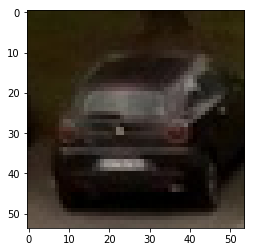

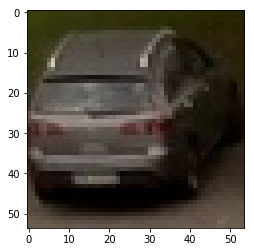

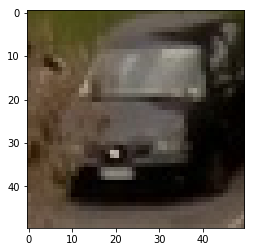

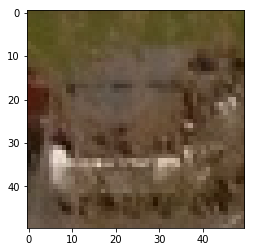

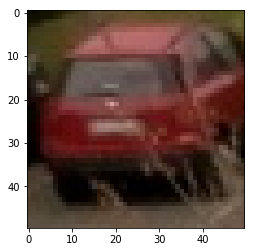

In [15]:
img = cv2.imread("/data/code4/deep-parking/dataset/FULL_IMAGE_1000x750/OVERCAST/2015-11-20/camera8/2015-11-20_1041.jpg")

# extract patches
for slotId, bbox in bbox_set2.items():
    #print(slotId, np.asarray(bbox)*ratio)
    bbox_dim = (np.asarray(bbox)*ratio).astype(int)   # turn it into int value
    patch = img[bbox_dim[1]:bbox_dim[1]+bbox_dim[3], bbox_dim[0]:bbox_dim[0]+bbox_dim[2]]
    # append patch into patches dict
    patches[slotId] = patch
    # display patch
    patch_display = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
    plt.imshow(patch_display)
    plt.show()
    # pass the patch to CNN network to get classification output
    

(131, 131, 3)


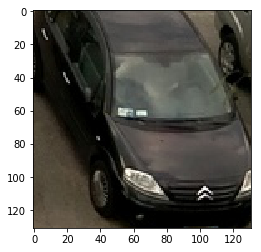

In [20]:
# display a patch
slotId = 211
#patches[slotId]
patch_display = cv2.cvtColor(patches[slotId], cv2.COLOR_BGR2RGB)
plt.imshow(patch_display)
print(patches[slotId].shape)

In [22]:
patch_test = patches[slotId]

In [60]:
patch_test.shape

(224, 224, 3)

In [40]:
# resize img to (h=224,w=224)
patch_test = cv2.resize(patch_test, (224,224))
# save img
cv2.imwrite('patch_test.jpg', patch_test)

True

In [2]:
# read patch_test2.jpg
patch_test2 = cv2.imread("patch_test2.jpg")

In [3]:
patch_test2.shape

(224, 224, 3)

In [4]:
# load model and weight for inference (TEST stage)
# -- 
net = caffe.Net('/data/code4/deep-parking/models/CNR-EXT/models/AlexNet-on-Combined_CNRParkAB_Ext_train_C1C8-val-CNRPark-EXT_val/deploy.prototxt', 
                '/data/code4/deep-parking/models/CNR-EXT/models/AlexNet-on-Combined_CNRParkAB_Ext_train_C1C8-val-CNRPark-EXT_val/snapshot_iter_2912.caffemodel', caffe.TEST)

In [5]:
# Preprocessing the patch_test

# define the transformer according to "data" blob in "net"
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
# bring the channel dimension to the front
transformer.set_transpose('data', (2,0,1))
#transformer.set_channel_swap('data', (2,1,0)) # if using RGB instead of BGR, no need due to already loaded from opencv
#normalizes the values in the image based on the 0-255 range
#transformer.set_raw_scale('data', 255.0)
transformer.set_raw_scale('data', 1.0)

In [6]:
# reshape the blobs so that they match the image shape
net.blobs['data'].reshape(1,3,224,224)
#net.blobs['data'].reshape(1,3,131,131)

In [7]:
# pre-process a patch_test using transformer
net.blobs['data'].data[...] = transformer.preprocess('data', patch_test2)

In [8]:
# compute the output
output = net.forward()

In [11]:
patch_test2.shape

(224, 224, 3)

In [9]:
# display the prob. output
output['score']
# it's "occupied" class

array([[1.000000e+00, 7.437363e-21]], dtype=float32)

In [52]:
# load "empty" space
patch_test2 = patches[324]
patch_test2.shape

(54, 54, 3)

In [55]:
patch_test2.shape

(224, 224, 3)

In [56]:
# save img
cv2.imwrite('patch_test2.jpg', patch_test2)

True

In [53]:
# resize to (224,224)
patch_test2 = cv2.resize(patch_test2, (224,224))
# save img
cv2.imwrite('patch_test2.jpg', patch_test2)

True

In [ ]:
# read patch_test2.jpg
patch_test = cv2.imread("patch_test.jpg")

In [64]:
# pre-process a patch_test using transformer
net.blobs['data'].data[...] = transformer.preprocess('data', patch_test)

In [ ]:
# compute the output
output = net.forward()

In [59]:
# display the prob. output
output['score']

array([[0.00404282, 0.9959572 ]], dtype=float32)

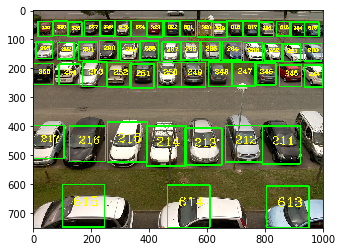

In [60]:
img = cv2.imread("/data/code4/deep-parking/dataset/FULL_IMAGE_1000x750/OVERCAST/2015-11-20/camera8/2015-11-20_1041.jpg")

# drawing bbox on it
for slotId, bbox in bbox_set2.items():
    #print(slotId, np.asarray(bbox)*ratio)
    bbox_dim = (np.asarray(bbox)*ratio).astype(int)   # turn it into int value
    #print(slotId, bbox_dim[0], bbox_dim[1])
    cv2.rectangle(img, (bbox_dim[0], bbox_dim[1]), (bbox_dim[0]+bbox_dim[2], bbox_dim[1]+bbox_dim[3]), (0,255,0),3)
    #print(bbox_dim[2])
    # put id text at the top of the bbox
    cv2.putText(img, str(slotId), 
                (bbox_dim[0]+bbox_dim[2]//2-bbox_dim[2]//4, bbox_dim[1]+bbox_dim[3]//2), 
                font, bbox_dim[2]/100 , (0,255,255), 2)

    
# save img
cv2.imwrite('image.jpg', img)

# display img
img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)

In [25]:
bbox_set[613]

[2088, 1570, 380, 373]

In [ ]:
curvature_text = "Curvature: Left = " + str(np.round(left_radius, 2)) + " m, Right = " + str(np.round(right_radius, 2)) + " m"
font = cv2.FONT_HERSHEY_COMPLEX    
cv2.putText(result, curvature_text, (30, 60), font, 1, (0,255,0), 2)